In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.12.0


In [2]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

"""
 NOTE : As of TF 1.12.0, you will need CUDA 9.0 and CUDNN 7.2.1 to use the pip installed package. I've heard the devs say you can compile CUDA 10 from source.
You should see the following output:

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K40c, pci bus
id: 0000:05:00.0
b: /job:localhost/replica:0/task:0/device:GPU:0
a: /job:localhost/replica:0/task:0/device:GPU:0
MatMul: /job:localhost/replica:0/task:0/device:GPU:0
[[ 22.  28.]
 [ 49.  64.]]
"""


[[22. 28.]
 [49. 64.]]


'\nYou should see the following output:\n\nDevice mapping:\n/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K40c, pci bus\nid: 0000:05:00.0\nb: /job:localhost/replica:0/task:0/device:GPU:0\na: /job:localhost/replica:0/task:0/device:GPU:0\nMatMul: /job:localhost/replica:0/task:0/device:GPU:0\n[[ 22.  28.]\n [ 49.  64.]]\n'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


 8192/29515 [=======>......................] - ETA: 0s

24576/29515 [=======================>......] - ETA: 0s

32768/29515 [=================================] - 0s 3us/step


    8192/26421880 [..............................] - ETA: 43s

   24576/26421880 [..............................] - ETA: 1:21

   57344/26421880 [..............................] - ETA: 1:01

  106496/26421880 [..............................] - ETA: 47s 

  180224/26421880 [..............................] - ETA: 35s

  303104/26421880 [..............................] - ETA: 25s

  450560/26421880 [..............................] - ETA: 20s

  516096/26421880 [..............................] - ETA: 24s

  647168/26421880 [..............................] - ETA: 24s

 1196032/26421880 [>.............................] - ETA: 14s

 1359872/26421880 [>.............................] - ETA: 13s

 1392640/26421880 [>.............................] - ETA: 14s

 1703936/26421880 [>.............................] - ETA: 12s

 1851392/26421880 [=>............................] - ETA: 12s

 1998848/26421880 [=>............................] - ETA: 11s

 2146304/26421880 [=>............................] - ETA: 11s

 2260992/26421880 [=>............................] - ETA: 12s

 2686976/26421880 [==>...........................] - ETA: 10s

 2834432/26421880 [==>...........................] - ETA: 10s

 2916352/26421880 [==>...........................] - ETA: 11s

 3342336/26421880 [==>...........................] - ETA: 9s 

 3489792/26421880 [==>...........................] - ETA: 9s

 3604480/26421880 [===>..........................] - ETA: 10s

 3768320/26421880 [===>..........................] - ETA: 10s

 3932160/26421880 [===>..........................] - ETA: 9s 

 4194304/26421880 [===>..........................] - ETA: 9s

 4423680/26421880 [====>.........................] - ETA: 9s

 4767744/26421880 [====>.........................] - ETA: 8s

 4915200/26421880 [====>.........................] - ETA: 8s

 4964352/26421880 [====>.........................] - ETA: 9s

 5128192/26421880 [====>.........................] - ETA: 8s

 5292032/26421880 [=====>........................] - ETA: 8s

 5537792/26421880 [=====>........................] - ETA: 8s

 5726208/26421880 [=====>........................] - ETA: 8s

 5931008/26421880 [=====>........................] - ETA: 8s

 6258688/26421880 [======>.......................] - ETA: 7s

 6340608/26421880 [======>.......................] - ETA: 8s

 6537216/26421880 [======>.......................] - ETA: 8s

 6701056/26421880 [======>.......................] - ETA: 7s

 6914048/26421880 [======>.......................] - ETA: 7s

 7061504/26421880 [=======>......................] - ETA: 7s

 7258112/26421880 [=======>......................] - ETA: 7s

 7561216/26421880 [=======>......................] - ETA: 7s

 7749632/26421880 [=======>......................] - ETA: 7s

 7815168/26421880 [=======>......................] - ETA: 7s

 7864320/26421880 [=======>......................] - ETA: 7s

 8290304/26421880 [========>.....................] - ETA: 7s

 8437760/26421880 [========>.....................] - ETA: 7s

 8601600/26421880 [========>.....................] - ETA: 6s

 8814592/26421880 [=========>....................] - ETA: 6s

 9142272/26421880 [=========>....................] - ETA: 6s

 9289728/26421880 [=========>....................] - ETA: 6s

 9404416/26421880 [=========>....................] - ETA: 6s

 9568256/26421880 [=========>....................] - ETA: 6s

 9732096/26421880 [==========>...................] - ETA: 6s

 9945088/26421880 [==========>...................] - ETA: 6s

10108928/26421880 [==========>...................] - ETA: 6s

10338304/26421880 [==========>...................] - ETA: 6s

10649600/26421880 [===========>..................] - ETA: 5s

10797056/26421880 [===========>..................] - ETA: 5s

10960896/26421880 [===========>..................] - ETA: 5s

11124736/26421880 [===========>..................] - ETA: 5s

11304960/26421880 [===========>..................] - ETA: 5s

11485184/26421880 [============>.................] - ETA: 5s

11689984/26421880 [============>.................] - ETA: 5s

12009472/26421880 [============>.................] - ETA: 5s

12156928/26421880 [============>.................] - ETA: 5s

12238848/26421880 [============>.................] - ETA: 5s

12419072/26421880 [=============>................] - ETA: 5s

12763136/26421880 [=============>................] - ETA: 5s

12943360/26421880 [=============>................] - ETA: 5s

13139968/26421880 [=============>................] - ETA: 4s

13467648/26421880 [==============>...............] - ETA: 4s

13615104/26421880 [==============>...............] - ETA: 4s

13631488/26421880 [==============>...............] - ETA: 4s

13795328/26421880 [==============>...............] - ETA: 4s

13959168/26421880 [==============>...............] - ETA: 4s

14172160/26421880 [===============>..............] - ETA: 4s

14352384/26421880 [===============>..............] - ETA: 4s

14532608/26421880 [===============>..............] - ETA: 4s

14729216/26421880 [===============>..............] - ETA: 4s

15040512/26421880 [================>.............] - ETA: 4s

15187968/26421880 [================>.............] - ETA: 4s

15335424/26421880 [================>.............] - ETA: 4s

15433728/26421880 [================>.............] - ETA: 4s

15515648/26421880 [================>.............] - ETA: 4s

15908864/26421880 [=================>............] - ETA: 3s

16121856/26421880 [=================>............] - ETA: 3s

16433152/26421880 [=================>............] - ETA: 3s

16531456/26421880 [=================>............] - ETA: 3s

16580608/26421880 [=================>............] - ETA: 3s

17022976/26421880 [==================>...........] - ETA: 3s

17317888/26421880 [==================>...........] - ETA: 3s

17907712/26421880 [===================>..........] - ETA: 3s

18055168/26421880 [===================>..........] - ETA: 3s

18104320/26421880 [===================>..........] - ETA: 3s

18186240/26421880 [===================>..........] - ETA: 3s

18350080/26421880 [===================>..........] - ETA: 3s

18726912/26421880 [====================>.........] - ETA: 2s

18923520/26421880 [====================>.........] - ETA: 2s

19251200/26421880 [====================>.........] - ETA: 2s

19398656/26421880 [=====================>........] - ETA: 2s

19546112/26421880 [=====================>........] - ETA: 2s

19595264/26421880 [=====================>........] - ETA: 2s

19759104/26421880 [=====================>........] - ETA: 2s

19914752/26421880 [=====================>........] - ETA: 2s

20086784/26421880 [=====================>........] - ETA: 2s

20267008/26421880 [======================>.......] - ETA: 2s

20463616/26421880 [======================>.......] - ETA: 2s

20758528/26421880 [======================>.......] - ETA: 2s

20905984/26421880 [======================>.......] - ETA: 2s

21020672/26421880 [======================>.......] - ETA: 1s

21200896/26421880 [=======================>......] - ETA: 1s

21348352/26421880 [=======================>......] - ETA: 1s

21544960/26421880 [=======================>......] - ETA: 1s

21741568/26421880 [=======================>......] - ETA: 1s

22085632/26421880 [========================>.....] - ETA: 1s

22233088/26421880 [========================>.....] - ETA: 1s

22380544/26421880 [========================>.....] - ETA: 1s

22429696/26421880 [========================>.....] - ETA: 1s

22609920/26421880 [========================>.....] - ETA: 1s

22757376/26421880 [========================>.....] - ETA: 1s

23166976/26421880 [=========================>....] - ETA: 1s

23511040/26421880 [=========================>....] - ETA: 1s

23658496/26421880 [=========================>....] - ETA: 1s

23789568/26421880 [==========================>...] - ETA: 0s

23953408/26421880 [==========================>...] - ETA: 0s

24100864/26421880 [==========================>...] - ETA: 0s

24395776/26421880 [==========================>...] - ETA: 0s

24576000/26421880 [==========================>...] - ETA: 0s

24788992/26421880 [===========================>..] - ETA: 0s

25083904/26421880 [===========================>..] - ETA: 0s

25231360/26421880 [===========================>..] - ETA: 0s

25378816/26421880 [===========================>..] - ETA: 0s

25395200/26421880 [===========================>..] - ETA: 0s

25886720/26421880 [============================>.] - ETA: 0s

26066944/26421880 [============================>.] - ETA: 0s

26427392/26421880 [==============================] - 10s 0us/step


8192/5148 [===============================================] - 0s 1us/step


   8192/4422102 [..............................] - ETA: 6s

  24576/4422102 [..............................] - ETA: 14s

  57344/4422102 [..............................] - ETA: 11s

 106496/4422102 [..............................] - ETA: 8s 

 172032/4422102 [>.............................] - ETA: 6s

 286720/4422102 [>.............................] - ETA: 4s

 425984/4422102 [=>............................] - ETA: 3s

 507904/4422102 [==>...........................] - ETA: 4s

 942080/4422102 [=====>........................] - ETA: 2s

 999424/4422102 [=====>........................] - ETA: 2s

1392640/4422102 [========>.....................] - ETA: 1s

1605632/4422102 [=========>....................] - ETA: 1s

1720320/4422102 [==========>...................] - ETA: 1s

2064384/4422102 [=============>................] - ETA: 1s

2211840/4422102 [==============>...............] - ETA: 1s

2359296/4422102 [===============>..............] - ETA: 0s

2506752/4422102 [================>.............] - ETA: 0s

2654208/4422102 [=================>............] - ETA: 0s

2801664/4422102 [==================>...........] - ETA: 0s

2867200/4422102 [==================>...........] - ETA: 0s

2883584/4422102 [==================>...........] - ETA: 0s

3620864/4422102 [=======================>......] - ETA: 0s

3768320/4422102 [========================>.....] - ETA: 0s

3915776/4422102 [=========================>....] - ETA: 0s

4063232/4422102 [==========================>...] - ETA: 0s

4079616/4422102 [==========================>...] - ETA: 0s

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


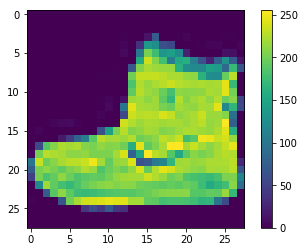

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0


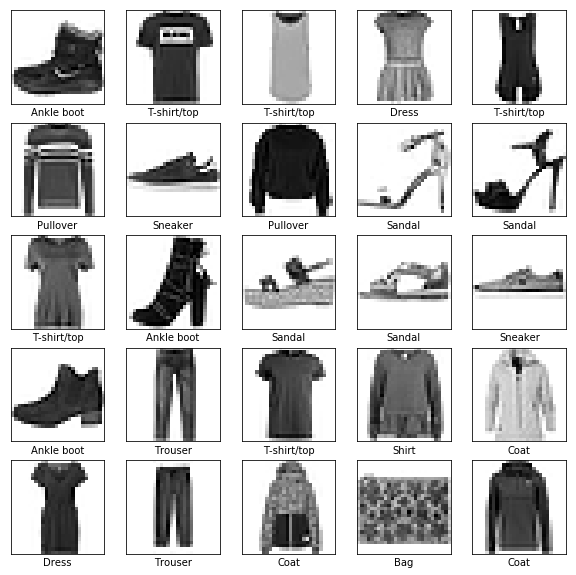

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5


   32/60000 [..............................] - ETA: 20:55 - loss: 2.2600 - acc: 0.1562

 1504/60000 [..............................] - ETA: 28s - loss: 1.1915 - acc: 0.5957  

 2528/60000 [>.............................] - ETA: 17s - loss: 1.0244 - acc: 0.6472

 3872/60000 [>.............................] - ETA: 11s - loss: 0.8941 - acc: 0.6921

 5056/60000 [=>............................] - ETA: 9s - loss: 0.8298 - acc: 0.7162 

 6368/60000 [==>...........................] - ETA: 7s - loss: 0.7844 - acc: 0.7294

 8000/60000 [===>..........................] - ETA: 6s - loss: 0.7449 - acc: 0.7418

 9792/60000 [===>..........................] - ETA: 5s - loss: 0.7125 - acc: 0.7546

11520/60000 [====>.........................] - ETA: 4s - loss: 0.6862 - acc: 0.7638

13344/60000 [=====>........................] - ETA: 3s - loss: 0.6696 - acc: 0.7691

14944/60000 [======>.......................] - ETA: 3s - loss: 0.6521 - acc: 0.7758

16768/60000 [=======>......................] - ETA: 3s - loss: 0.6369 - acc: 0.7796

18560/60000 [========>.....................] - ETA: 2s - loss: 0.6236 - acc: 0.7838

20320/60000 [=========>....................] - ETA: 2s - loss: 0.6145 - acc: 0.7875

22112/60000 [==========>...................] - ETA: 2s - loss: 0.6004 - acc: 0.7921

23872/60000 [==========>...................] - ETA: 2s - loss: 0.5904 - acc: 0.7955

25472/60000 [===========>..................] - ETA: 2s - loss: 0.5811 - acc: 0.7988

27040/60000 [============>.................] - ETA: 1s - loss: 0.5754 - acc: 0.8007

28960/60000 [=============>................] - ETA: 1s - loss: 0.5677 - acc: 0.8031

30880/60000 [==============>...............] - ETA: 1s - loss: 0.5625 - acc: 0.8046

32672/60000 [===============>..............] - ETA: 1s - loss: 0.5559 - acc: 0.8067

34496/60000 [================>.............] - ETA: 1s - loss: 0.5518 - acc: 0.8084

36288/60000 [=================>............] - ETA: 1s - loss: 0.5476 - acc: 0.8097

38144/60000 [==================>...........] - ETA: 1s - loss: 0.5438 - acc: 0.8113

40032/60000 [===================>..........] - ETA: 0s - loss: 0.5406 - acc: 0.8126

41888/60000 [===================>..........] - ETA: 0s - loss: 0.5372 - acc: 0.8138

43712/60000 [====================>.........] - ETA: 0s - loss: 0.5332 - acc: 0.8148

45568/60000 [=====================>........] - ETA: 0s - loss: 0.5283 - acc: 0.8161

47328/60000 [======================>.......] - ETA: 0s - loss: 0.5257 - acc: 0.8169

49152/60000 [=======================>......] - ETA: 0s - loss: 0.5223 - acc: 0.8180

50976/60000 [========================>.....] - ETA: 0s - loss: 0.5196 - acc: 0.8187

52736/60000 [=========================>....] - ETA: 0s - loss: 0.5166 - acc: 0.8198

54432/60000 [==========================>...] - ETA: 0s - loss: 0.5138 - acc: 0.8208

56192/60000 [===========================>..] - ETA: 0s - loss: 0.5107 - acc: 0.8218

58016/60000 [============================>.] - ETA: 0s - loss: 0.5080 - acc: 0.8229

59744/60000 [============================>.] - ETA: 0s - loss: 0.5055 - acc: 0.8237

60000/60000 [==============================] - 2s 41us/step - loss: 0.5050 - acc: 0.8238


Epoch 2/5
   32/60000 [..............................] - ETA: 4s - loss: 0.6455 - acc: 0.7812

 1792/60000 [..............................] - ETA: 1s - loss: 0.4219 - acc: 0.8538

 3552/60000 [>.............................] - ETA: 1s - loss: 0.4128 - acc: 0.8533

 5440/60000 [=>............................] - ETA: 1s - loss: 0.4022 - acc: 0.8585

 7296/60000 [==>...........................] - ETA: 1s - loss: 0.3944 - acc: 0.8607

 9184/60000 [===>..........................] - ETA: 1s - loss: 0.4033 - acc: 0.8576

11072/60000 [====>.........................] - ETA: 1s - loss: 0.4017 - acc: 0.8565

12800/60000 [=====>........................] - ETA: 1s - loss: 0.4001 - acc: 0.8564

14592/60000 [======>.......................] - ETA: 1s - loss: 0.3961 - acc: 0.8583

16384/60000 [=======>......................] - ETA: 1s - loss: 0.3967 - acc: 0.8587

18144/60000 [========>.....................] - ETA: 1s - loss: 0.3931 - acc: 0.8604

20000/60000 [=========>....................] - ETA: 1s - loss: 0.3924 - acc: 0.8602

21824/60000 [=========>....................] - ETA: 1s - loss: 0.3930 - acc: 0.8594

23648/60000 [==========>...................] - ETA: 1s - loss: 0.3908 - acc: 0.8599

25440/60000 [===========>..................] - ETA: 0s - loss: 0.3907 - acc: 0.8597

27264/60000 [============>.................] - ETA: 0s - loss: 0.3917 - acc: 0.8597

29088/60000 [=============>................] - ETA: 0s - loss: 0.3904 - acc: 0.8602

30880/60000 [==============>...............] - ETA: 0s - loss: 0.3905 - acc: 0.8604

32672/60000 [===============>..............] - ETA: 0s - loss: 0.3913 - acc: 0.8599

34496/60000 [================>.............] - ETA: 0s - loss: 0.3882 - acc: 0.8609

36320/60000 [=================>............] - ETA: 0s - loss: 0.3886 - acc: 0.8611

38144/60000 [==================>...........] - ETA: 0s - loss: 0.3871 - acc: 0.8615

39872/60000 [==================>...........] - ETA: 0s - loss: 0.3880 - acc: 0.8612

41696/60000 [===================>..........] - ETA: 0s - loss: 0.3871 - acc: 0.8615

43552/60000 [====================>.........] - ETA: 0s - loss: 0.3868 - acc: 0.8620

45216/60000 [=====================>........] - ETA: 0s - loss: 0.3855 - acc: 0.8625

47072/60000 [======================>.......] - ETA: 0s - loss: 0.3853 - acc: 0.8628

48928/60000 [=======================>......] - ETA: 0s - loss: 0.3839 - acc: 0.8633

50784/60000 [========================>.....] - ETA: 0s - loss: 0.3834 - acc: 0.8633

52640/60000 [=========================>....] - ETA: 0s - loss: 0.3822 - acc: 0.8634

54464/60000 [==========================>...] - ETA: 0s - loss: 0.3812 - acc: 0.8636

56224/60000 [===========================>..] - ETA: 0s - loss: 0.3804 - acc: 0.8639

58048/60000 [============================>.] - ETA: 0s - loss: 0.3795 - acc: 0.8645

59840/60000 [============================>.] - ETA: 0s - loss: 0.3792 - acc: 0.8646

60000/60000 [==============================] - 2s 28us/step - loss: 0.3790 - acc: 0.8647


Epoch 3/5
   32/60000 [..............................] - ETA: 4s - loss: 0.3856 - acc: 0.8125

 1760/60000 [..............................] - ETA: 1s - loss: 0.3385 - acc: 0.8790

 3616/60000 [>.............................] - ETA: 1s - loss: 0.3484 - acc: 0.8772

 5472/60000 [=>............................] - ETA: 1s - loss: 0.3445 - acc: 0.8790

 7360/60000 [==>...........................] - ETA: 1s - loss: 0.3372 - acc: 0.8785

 8960/60000 [===>..........................] - ETA: 1s - loss: 0.3407 - acc: 0.8770

10848/60000 [====>.........................] - ETA: 1s - loss: 0.3431 - acc: 0.8758

12672/60000 [=====>........................] - ETA: 1s - loss: 0.3423 - acc: 0.8757

14400/60000 [======>.......................] - ETA: 1s - loss: 0.3456 - acc: 0.8749

16256/60000 [=======>......................] - ETA: 1s - loss: 0.3455 - acc: 0.8754

18112/60000 [========>.....................] - ETA: 1s - loss: 0.3431 - acc: 0.8763

20000/60000 [=========>....................] - ETA: 1s - loss: 0.3420 - acc: 0.8767

21824/60000 [=========>....................] - ETA: 1s - loss: 0.3431 - acc: 0.8766

23712/60000 [==========>...................] - ETA: 1s - loss: 0.3429 - acc: 0.8770

25344/60000 [===========>..................] - ETA: 0s - loss: 0.3419 - acc: 0.8771

27200/60000 [============>.................] - ETA: 0s - loss: 0.3412 - acc: 0.8778

28864/60000 [=============>................] - ETA: 0s - loss: 0.3432 - acc: 0.8767

30496/60000 [==============>...............] - ETA: 0s - loss: 0.3441 - acc: 0.8766

32320/60000 [===============>..............] - ETA: 0s - loss: 0.3435 - acc: 0.8766

34208/60000 [================>.............] - ETA: 0s - loss: 0.3421 - acc: 0.8774

36064/60000 [=================>............] - ETA: 0s - loss: 0.3412 - acc: 0.8778

37920/60000 [=================>............] - ETA: 0s - loss: 0.3422 - acc: 0.8777

39712/60000 [==================>...........] - ETA: 0s - loss: 0.3414 - acc: 0.8774

41568/60000 [===================>..........] - ETA: 0s - loss: 0.3417 - acc: 0.8772

43424/60000 [====================>.........] - ETA: 0s - loss: 0.3414 - acc: 0.8772

45248/60000 [=====================>........] - ETA: 0s - loss: 0.3419 - acc: 0.8766

47040/60000 [======================>.......] - ETA: 0s - loss: 0.3422 - acc: 0.8765

48864/60000 [=======================>......] - ETA: 0s - loss: 0.3412 - acc: 0.8769

50720/60000 [========================>.....] - ETA: 0s - loss: 0.3415 - acc: 0.8768

52576/60000 [=========================>....] - ETA: 0s - loss: 0.3413 - acc: 0.8771

54400/60000 [==========================>...] - ETA: 0s - loss: 0.3408 - acc: 0.8770

56256/60000 [===========================>..] - ETA: 0s - loss: 0.3408 - acc: 0.8770

58112/60000 [============================>.] - ETA: 0s - loss: 0.3399 - acc: 0.8775

59872/60000 [============================>.] - ETA: 0s - loss: 0.3389 - acc: 0.8776

60000/60000 [==============================] - 2s 28us/step - loss: 0.3388 - acc: 0.8777


Epoch 4/5
   32/60000 [..............................] - ETA: 3s - loss: 0.3298 - acc: 0.8438

 1792/60000 [..............................] - ETA: 1s - loss: 0.3307 - acc: 0.8800

 3552/60000 [>.............................] - ETA: 1s - loss: 0.3338 - acc: 0.8812

 5408/60000 [=>............................] - ETA: 1s - loss: 0.3168 - acc: 0.8852

 7232/60000 [==>...........................] - ETA: 1s - loss: 0.3219 - acc: 0.8837

 8864/60000 [===>..........................] - ETA: 1s - loss: 0.3217 - acc: 0.8831

10144/60000 [====>.........................] - ETA: 1s - loss: 0.3229 - acc: 0.8824

11872/60000 [====>.........................] - ETA: 1s - loss: 0.3173 - acc: 0.8853

13696/60000 [=====>........................] - ETA: 1s - loss: 0.3161 - acc: 0.8857

15552/60000 [======>.......................] - ETA: 1s - loss: 0.3201 - acc: 0.8843

17376/60000 [=======>......................] - ETA: 1s - loss: 0.3174 - acc: 0.8846

19200/60000 [========>.....................] - ETA: 1s - loss: 0.3156 - acc: 0.8859

20992/60000 [=========>....................] - ETA: 1s - loss: 0.3138 - acc: 0.8872

22784/60000 [==========>...................] - ETA: 1s - loss: 0.3136 - acc: 0.8872

24608/60000 [===========>..................] - ETA: 1s - loss: 0.3111 - acc: 0.8878

26400/60000 [============>.................] - ETA: 0s - loss: 0.3139 - acc: 0.8867

28192/60000 [=============>................] - ETA: 0s - loss: 0.3111 - acc: 0.8871

29984/60000 [=============>................] - ETA: 0s - loss: 0.3124 - acc: 0.8869

31616/60000 [==============>...............] - ETA: 0s - loss: 0.3124 - acc: 0.8872

33440/60000 [===============>..............] - ETA: 0s - loss: 0.3136 - acc: 0.8866

35296/60000 [================>.............] - ETA: 0s - loss: 0.3142 - acc: 0.8864

37088/60000 [=================>............] - ETA: 0s - loss: 0.3134 - acc: 0.8861

38912/60000 [==================>...........] - ETA: 0s - loss: 0.3135 - acc: 0.8857

40576/60000 [===================>..........] - ETA: 0s - loss: 0.3141 - acc: 0.8856

42464/60000 [====================>.........] - ETA: 0s - loss: 0.3142 - acc: 0.8855

44192/60000 [=====================>........] - ETA: 0s - loss: 0.3146 - acc: 0.8853

46016/60000 [======================>.......] - ETA: 0s - loss: 0.3155 - acc: 0.8851

47904/60000 [======================>.......] - ETA: 0s - loss: 0.3155 - acc: 0.8850

49728/60000 [=======================>......] - ETA: 0s - loss: 0.3154 - acc: 0.8850

51648/60000 [========================>.....] - ETA: 0s - loss: 0.3155 - acc: 0.8849

53440/60000 [=========================>....] - ETA: 0s - loss: 0.3148 - acc: 0.8852

55296/60000 [==========================>...] - ETA: 0s - loss: 0.3147 - acc: 0.8853

57120/60000 [===========================>..] - ETA: 0s - loss: 0.3148 - acc: 0.8853

59008/60000 [============================>.] - ETA: 0s - loss: 0.3152 - acc: 0.8852

60000/60000 [==============================] - 2s 28us/step - loss: 0.3145 - acc: 0.8854


Epoch 5/5
   32/60000 [..............................] - ETA: 4s - loss: 0.3496 - acc: 0.9062

 1664/60000 [..............................] - ETA: 1s - loss: 0.2917 - acc: 0.9002

 3552/60000 [>.............................] - ETA: 1s - loss: 0.2941 - acc: 0.8995

 5376/60000 [=>............................] - ETA: 1s - loss: 0.2862 - acc: 0.9005

 7232/60000 [==>...........................] - ETA: 1s - loss: 0.2863 - acc: 0.8984

 9024/60000 [===>..........................] - ETA: 1s - loss: 0.2883 - acc: 0.8974

10944/60000 [====>.........................] - ETA: 1s - loss: 0.2914 - acc: 0.8962

12832/60000 [=====>........................] - ETA: 1s - loss: 0.2917 - acc: 0.8962

14560/60000 [======>.......................] - ETA: 1s - loss: 0.2924 - acc: 0.8946

16448/60000 [=======>......................] - ETA: 1s - loss: 0.2918 - acc: 0.8952

18144/60000 [========>.....................] - ETA: 1s - loss: 0.2937 - acc: 0.8942

20000/60000 [=========>....................] - ETA: 1s - loss: 0.2919 - acc: 0.8946

21856/60000 [=========>....................] - ETA: 1s - loss: 0.2885 - acc: 0.8956

23712/60000 [==========>...................] - ETA: 1s - loss: 0.2925 - acc: 0.8945

25536/60000 [===========>..................] - ETA: 0s - loss: 0.2942 - acc: 0.8940

27328/60000 [============>.................] - ETA: 0s - loss: 0.2947 - acc: 0.8934

29216/60000 [=============>................] - ETA: 0s - loss: 0.2955 - acc: 0.8923

31040/60000 [==============>...............] - ETA: 0s - loss: 0.2940 - acc: 0.8924

32800/60000 [===============>..............] - ETA: 0s - loss: 0.2932 - acc: 0.8924

34656/60000 [================>.............] - ETA: 0s - loss: 0.2936 - acc: 0.8922

36544/60000 [=================>............] - ETA: 0s - loss: 0.2954 - acc: 0.8918

37824/60000 [=================>............] - ETA: 0s - loss: 0.2961 - acc: 0.8918

39712/60000 [==================>...........] - ETA: 0s - loss: 0.2969 - acc: 0.8919

41632/60000 [===================>..........] - ETA: 0s - loss: 0.2968 - acc: 0.8916

43200/60000 [====================>.........] - ETA: 0s - loss: 0.2970 - acc: 0.8917

44992/60000 [=====================>........] - ETA: 0s - loss: 0.2974 - acc: 0.8919

46816/60000 [======================>.......] - ETA: 0s - loss: 0.2971 - acc: 0.8917

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2981 - acc: 0.8913

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2983 - acc: 0.8911

52288/60000 [=========================>....] - ETA: 0s - loss: 0.2977 - acc: 0.8912

54112/60000 [==========================>...] - ETA: 0s - loss: 0.2971 - acc: 0.8912

55872/60000 [==========================>...] - ETA: 0s - loss: 0.2968 - acc: 0.8914

57728/60000 [===========================>..] - ETA: 0s - loss: 0.2981 - acc: 0.8907

59584/60000 [============================>.] - ETA: 0s - loss: 0.2975 - acc: 0.8909

60000/60000 [==============================] - 2s 28us/step - loss: 0.2974 - acc: 0.8910


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

   32/10000 [..............................] - ETA: 8s

 2976/10000 [=======>......................] - ETA: 0s

 6112/10000 [=================>............] - ETA: 0s

 9408/10000 [===========================>..] - ETA: 0s

10000/10000 [==============================] - 0s 20us/step


Test accuracy: 0.8624


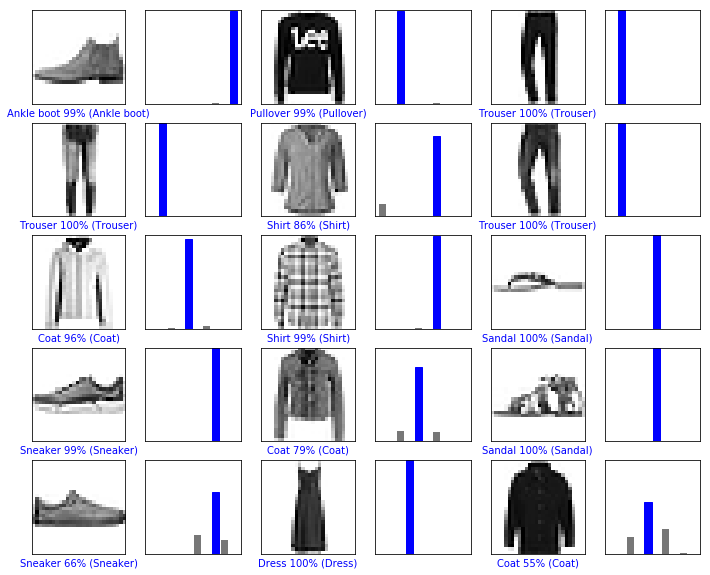

In [14]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)